In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,NaN,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	2
float64		column 3	3
float64		column 4	1
float64		column 5	5
float64		column 6	1
float64		column 7	2
float64		column 8	1
float64		column 9	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,212.000000,212.000000,211.000000,213.000000,209.000000,213.000000,212.000000,213.000000,213.000000
mean,1.518384,13.411274,2.688815,1.445915,72.649043,0.499014,8.962925,0.175869,0.057277
std,0.003045,0.812734,1.438180,0.500227,0.779139,0.653097,1.427946,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.922500,2.140000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517685,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519165,13.815000,3.600000,1.630000,73.080000,0.610000,9.192500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

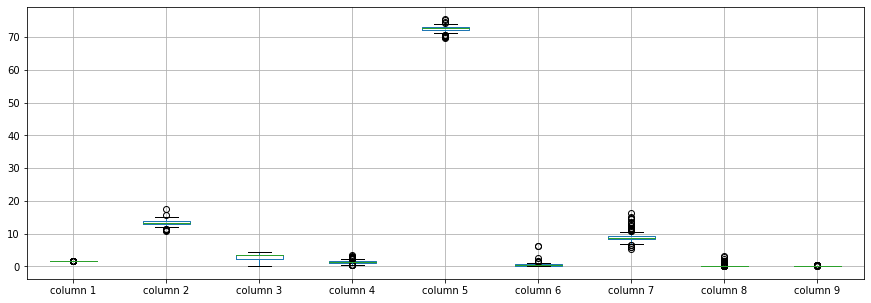

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518384
column 2    13.411274
column 3     2.688815
column 4     1.445915
column 5    72.649043
column 6     0.499014
column 7     8.962925
column 8     0.175869
column 9     0.057277
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.195994,-0.122123,-0.409543,-0.536946,-0.287563,0.811863,-0.004954,0.138123
column 2,-0.195994,1.000000,-0.277287,0.144524,-0.055442,-0.242974,-0.280647,0.326337,-0.248992
column 3,-0.122123,-0.277287,1.000000,-0.478045,-0.159002,-0.002166,-0.448445,-0.479389,0.083065
column 4,-0.409543,0.144524,-0.478045,1.000000,-0.016692,0.325358,-0.260820,0.483400,-0.072157
column 5,-0.536946,-0.055442,-0.159002,-0.016692,1.000000,-0.201032,-0.202774,-0.113055,-0.093709
column 6,-0.287563,-0.242974,-0.002166,0.325358,-0.201032,1.000000,-0.315607,-0.042293,-0.009249
column 7,0.811863,-0.280647,-0.448445,-0.260820,-0.202774,-0.315607,1.000000,-0.117289,0.121786
column 8,-0.004954,0.326337,-0.479389,0.483400,-0.113055,-0.042293,-0.117289,1.000000,-0.060778
column 9,0.138123,-0.248992,0.083065,-0.072157,-0.093709,-0.009249,0.121786,-0.060778,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+78,9+78+78,9+78+78+78,9+78+78+78+78,9+78+78+78+78+78,9+78+78+78+78,9+78+78+78,9+78+78,9+78,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.17311389629657
Epoch: 1 , loss: 100.53034973144531
Epoch: 2 , loss: 100.75845806415265
Epoch: 3 , loss: 100.78438333364633
Epoch: 4 , loss: 100.33384763277493
Epoch: 5 , loss: 100.388305077186
Epoch: 6 , loss: 100.34259913517879
Epoch: 7 , loss: 100.29725764347957
Epoch: 8 , loss: 100.32317528357872
Epoch: 9 , loss: 100.29323049692007
Epoch: 10 , loss: 100.55809373121996
Epoch: 11 , loss: 100.21949357252855
Epoch: 12 , loss: 100.53575134277344
Epoch: 13 , loss: 100.11744044377254
Epoch: 14 , loss: 99.96170924260066
Epoch: 15 , loss: 99.69525439922626
Epoch: 16 , loss: 99.10341350848859
Epoch: 17 , loss: 98.48240250807542
Epoch: 18 , loss: 98.07683680607722
Epoch: 19 , loss: 97.53299419696515
Epoch: 20 , loss: 96.8896994957557
Epoch: 21 , loss: 95.70938227726863
Epoch: 22 , loss: 95.70557697002704
Epoch: 23 , loss: 94.21727576622597
Epoch: 24 , loss: 92.48702416053185
Epoch: 25 , loss: 91.50614811823

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,2.651905,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(89.55448425782251, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.08212722779682526

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,11.401905,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.830000,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.780000,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.220000,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.070000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.180000,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.400000,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.440000,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.480000,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NN_1(imp).xlsx", index=False, header=False)